In [15]:
import os
import pandas as pd
import numpy as np
import warnings
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

# Defining file store location
import_path = r"C:\Users\admin\Desktop\Masters AI\Project A\Week 3\Data Files"
export_path = r"C:\Users\admin\Desktop\Masters AI\Project A\Week 3\Data Files"
plots_path = r'C:\Users\admin\Desktop\Masters AI\Project A\Week 3\plots'


In [16]:
file, date_fields = 'wf1.csv', ['date','acq_date']
vars()[file[0:-4]] = pd.read_csv('\\'.join([import_path,file[:]]),parse_dates=date_fields)
print(file,' = ',vars()[file[0:-4]].shape)

wf1.csv  =  (1974638, 61)


In [17]:
file, date_fields = 'weather_fire.csv', ['date','acq_date']
vars()[file[0:-4]] = pd.read_csv('\\'.join([import_path,file[:]]),parse_dates=date_fields)
print(file,' = ',vars()[file[0:-4]].shape)

weather_fire.csv  =  (2054739, 31)


In [18]:
# set states values for drop function
states = ['state_Australian Capital Territory', 'state_New South Wales','state_Northern Territory', 'state_Queensland','state_South Australia', 'state_Tasmania', 'state_Victoria','state_Western Australia']

In [19]:
wf1.columns

Index(['date', 'maxC', 'maxC_90ave', 'minC', 'minC_14ave', 'minC_30ave',
       'minC_90ave', 'Snow_cm', 'sunHour', 'uv', 'uv_14ave', 'uv_30ave',
       'uv_90ave', 'DewPointC', 'FeelsLikeC', 'HeatIndexC', 'WindChillC',
       'WindGustKmph', 'cloudcover', 'humidity', 'humidity_14ave',
       'humidity_30ave', 'humidity_90ave', 'precipMM', 'precipMM_7ave',
       'precipMM_14ave', 'precipMM_30ave', 'precipMM_90ave', 'pressure',
       'tempC', 'visibility', 'windAZI', 'windKmph', 'location', 'acq_date',
       'lat_suburb', 'long_suburb', 'suburb', 'region', 'year', 'month_sin',
       'month_cos', 'state_Australian Capital Territory',
       'state_New South Wales', 'state_Northern Territory', 'state_Queensland',
       'state_South Australia', 'state_Tasmania', 'state_Victoria',
       'state_Western Australia', 'season_summer', 'season_autumn',
       'season_winter', 'season_spring', 'zone_north', 'zone_south', 'frp_min',
       'frp_max', 'frp_sum', 'frp_median', 'frp_mean'],
    

In [20]:
weather_fire.columns

Index(['date', 'maxC', 'minC', 'Snow_cm', 'sunHour', 'uv', 'DewPointC',
       'FeelsLikeC', 'HeatIndexC', 'WindChillC', 'WindGustKmph', 'cloudcover',
       'humidity', 'precipMM', 'pressure', 'tempC', 'visibility', 'windAZI',
       'windKmph', 'location', 'acq_date', 'lat_suburb', 'long_suburb',
       'suburb', 'state', 'region', 'frp_min', 'frp_max', 'frp_sum',
       'frp_median', 'frp_mean'],
      dtype='object')

In [21]:
wf1 = weather_fire.copy()

# adding rolling 90 day averages for 'maxC', 'minC', humidity' and 'uv'
wf1['maxC_90ave'] = wf1.maxC.rolling(90).mean().round(1)

# wf1['minC_14ave'] = wf1.minC.rolling(14).mean().round(1)
# wf1['minC_30ave'] = wf1.minC.rolling(30).mean().round(1)
wf1['minC_90ave'] = wf1.minC.rolling(90).mean().round(1)

# wf1['uv_14ave'] = wf1.uv.rolling(14).mean().round(1)
# wf1['uv_30ave'] = wf1.uv.rolling(30).mean().round(1)
wf1['uv_90ave'] = wf1.uv.rolling(90).mean().round(1)

# wf1['humidity_14ave'] = wf1.humidity.rolling(14).mean().round(1)
# wf1['humidity_30ave'] = wf1.humidity.rolling(30).mean().round(1)
wf1['humidity_90ave'] = wf1.humidity.rolling(90).mean().round(1)

# wf1['precipMM_7ave'] = wf1.precipMM.rolling(7).mean().round(1)
# wf1['precipMM_14ave'] = wf1.precipMM.rolling(14).mean().round(1)
wf1['precipMM_30ave'] = wf1.precipMM.rolling(30).mean().round(1)
# wf1['precipMM_90ave'] = wf1.precipMM.rolling(90).mean().round(1)

# this data needs shift(1) parameter. this offsets moving average one day so it
# does not include current day value in average. this makes it valid to use in prediction
wf1['frp_max_7'] = wf1['frp_max'].rolling(window=7).mean().shift(1).round(1)
# wf1['frp_max_14'] = wf1['frp_max'].rolling(window=14).mean().shift(1).round(1)
# wf1['frp_max_30'] = wf1['frp_max'].rolling(window=30).mean().shift(1).round(1)
wf1['frp_max_90'] = wf1['frp_max'].rolling(window=90).mean().shift(1).round(1)

# adding 'year' and 'month' variables
# wf1['year'] = wf1.date.dt.year
wf1['month'] = wf1.date.dt.month

# converting month cyclical values (through trigonometric transformation)
wf1['month_sin'] = np.sin((wf1.month-1)*(2.*np.pi/12))
wf1['month_cos'] = np.cos((wf1.month-1)*(2.*np.pi/12))

# # adding season value - based on month value
# wf1['season'] = 0
# wf1['season'] = np.where(wf1['month'].between(1,3), 'summer', wf1['season'])
# wf1['season'] = np.where(wf1['month'].between(3,6), 'autumn', wf1['season'])
# wf1['season'] = np.where(wf1['month'].between(6,9), 'winter', wf1['season'])
# wf1['season'] = np.where(wf1['month'].between(9,12), 'spring', wf1['season'])
# wf1['season'] = np.where(wf1['month'] == 12, 'summer', wf1['season'])

# # adding latitude zone value - based on tropic of capricorn latitide (tropic vs. subtropic)
# wf1['zone'] = 0
# wf1['zone'] = np.where(wf1['lat_suburb'] < -23.43 , 'south', wf1['zone'])
# wf1['zone'] = np.where(wf1['lat_suburb'] > -23.43 , 'north', wf1['zone'])

# change frp_max values > 1000 to 1000 
wf1.loc[wf1['frp_max'] > 1000, 'frp_max'] = 1000

# # creating a duplicate of dataframe prior to encoding (for testing purposes)
# wf1_temp = wf1.copy()

# # encoding state and season values as individual columns with binary responses
# wf1 = pd.get_dummies(wf1, columns=['state', 'season', 'zone'], prefix=['state', 'season', 'zone'])

# dropping first 90 rows - these have NaNs due to 90 day averaging
wf1 = wf1[wf1.date > '2014-11-29'].reset_index(drop=True)

# # reordering columns
# wf1 = wf1[['date', 'maxC', 'maxC_90ave','minC','minC_14ave', 'minC_30ave', 'minC_90ave','Snow_cm', 'sunHour', 'uv', 'uv_14ave', 'uv_30ave','uv_90ave','DewPointC','FeelsLikeC', 'HeatIndexC', 'WindChillC', 'WindGustKmph', 'cloudcover',
#        'humidity', 'humidity_14ave', 'humidity_30ave', 'humidity_90ave', 'precipMM', 'precipMM_7ave', 'precipMM_14ave', 'precipMM_30ave',
#        'precipMM_90ave','pressure', 'tempC', 'visibility', 'windAZI','windKmph', 'location', 'acq_date', 'lat_suburb', 'long_suburb',
#        'suburb', 'region', 'year', 'month_sin', 'month_cos','state_Australian Capital Territory', 'state_New South Wales',
#        'state_Northern Territory', 'state_Queensland', 'state_South Australia','state_Tasmania', 'state_Victoria', 'state_Western Australia',
#        'season_summer', 'season_autumn', 'season_winter', 'season_spring', 'zone_north', 'zone_south','frp_min', 'frp_max', 'frp_sum', 'frp_median','frp_mean']]

pd.set_option('display.max_columns', 20)
wf1

,date,maxC,minC,Snow_cm,sunHour,uv,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,...,maxC_90ave,minC_90ave,uv_90ave,humidity_90ave,precipMM_30ave,frp_max_7,frp_max_90,month,month_sin,month_cos
0,2014-11-30,21,12,0.0,14.5,5,12,16,16,16,...,18.6,11.6,4.1,78.3,0.8,0.8,0.4,11,-0.866025,0.500000
1,2014-12-01,20,14,0.0,10.2,4,13,16,16,16,...,18.6,11.6,4.2,78.3,0.8,0.8,0.4,12,-0.500000,0.866025
2,2014-12-02,17,12,0.0,12.4,4,9,13,14,13,...,18.6,11.7,4.2,78.3,0.8,0.8,0.4,12,-0.500000,0.866025
3,2014-12-03,24,12,0.0,14.5,5,11,16,17,16,...,18.7,11.7,4.2,78.3,0.8,0.0,0.4,12,-0.500000,0.866025
4,2014-12-04,18,13,0.0,9.1,4,12,15,15,15,...,18.7,11.7,4.2,78.3,0.8,0.0,0.4,12,-0.500000,0.866025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1973733,2020-11-26,28,15,0.0,14.5,6,14,23,23,22,...,17.2,8.9,3.7,80.7,4.7,0.0,0.1,11,-0.866025,0.500000
1973734,2020-11-27,29,15,0.0,14.5,7,15,24,24,23,...,17.4,9.1,3.8,80.5,4.3,0.0,0.1,11,-0.866025,0.500000
1973735,2020-11-28,28,20,0.0,13.4,7,16,25,25,24,...,17.5,9.2,3.8,80.3,3.8,0.0,0.1,11,-0.866025,0.500000
1973736,2020-11-29,25,20,0.0,10.2,5,15,23,23,22,...,17.7,9.4,3.8,80.1,3.6,0.0,0.1,11,-0.866025,0.500000


In [22]:
# create FRP category variable (categorical, low,med,high)

wf1b = wf1.copy()

wf1b['cat'] = 0

# BINARY - frp_MAX 
wf1b['cat'] = np.where(wf1b['frp_max'] < 12, 'low', wf1b['cat'])
wf1b['cat'] = np.where(wf1b['frp_max'] >= 12, 'high', wf1b['cat'])

print(wf1b.cat.value_counts(),'\n')

drop_wf1 = ['date','Snow_cm','tempC','location','acq_date','location','suburb', 'region','state',
                'frp_min','frp_max','frp_sum','frp_median','frp_mean', 'month']

wf1b_ed = wf1b.drop(drop_wf1, axis = 1) 

# -----------------------------------------------------------------
# Victoria only data
# wf1b_ed_vic = wf1b_ed[wf1b_ed.state_Victoria == 1]
# wf1b_ed_vic = wf1b_ed_vic.drop(states ,axis=1).reset_index(drop=True)
# -----------------------------------------------------------------

# DROP STATES
# wf1b_ed = wf1b_ed.drop(states ,axis=1).reset_index(drop=True)

pd.set_option('display.max_columns', 20)
print(wf1b_ed.columns,'\n')
wf1b_ed

low     1908188
high      65550
Name: cat, dtype: int64 

Index(['maxC', 'minC', 'sunHour', 'uv', 'DewPointC', 'FeelsLikeC',
       'HeatIndexC', 'WindChillC', 'WindGustKmph', 'cloudcover', 'humidity',
       'precipMM', 'pressure', 'visibility', 'windAZI', 'windKmph',
       'lat_suburb', 'long_suburb', 'maxC_90ave', 'minC_90ave', 'uv_90ave',
       'humidity_90ave', 'precipMM_30ave', 'frp_max_7', 'frp_max_90',
       'month_sin', 'month_cos', 'cat'],
      dtype='object') 



,maxC,minC,sunHour,uv,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,...,maxC_90ave,minC_90ave,uv_90ave,humidity_90ave,precipMM_30ave,frp_max_7,frp_max_90,month_sin,month_cos,cat
0,21,12,14.5,5,12,16,16,16,14,29,...,18.6,11.6,4.1,78.3,0.8,0.8,0.4,-0.866025,0.500000,low
1,20,14,10.2,4,13,16,16,16,23,71,...,18.6,11.6,4.2,78.3,0.8,0.8,0.4,-0.500000,0.866025,low
2,17,12,12.4,4,9,13,14,13,25,47,...,18.6,11.7,4.2,78.3,0.8,0.8,0.4,-0.500000,0.866025,low
3,24,12,14.5,5,11,16,17,16,22,31,...,18.7,11.7,4.2,78.3,0.8,0.0,0.4,-0.500000,0.866025,low
4,18,13,9.1,4,12,15,15,15,22,59,...,18.7,11.7,4.2,78.3,0.8,0.0,0.4,-0.500000,0.866025,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1973733,28,15,14.5,6,14,23,23,22,11,6,...,17.2,8.9,3.7,80.7,4.7,0.0,0.1,-0.866025,0.500000,low
1973734,29,15,14.5,7,15,24,24,23,9,4,...,17.4,9.1,3.8,80.5,4.3,0.0,0.1,-0.866025,0.500000,low
1973735,28,20,13.4,7,16,25,25,24,11,25,...,17.5,9.2,3.8,80.3,3.8,0.0,0.1,-0.866025,0.500000,low
1973736,25,20,10.2,5,15,23,23,22,19,61,...,17.7,9.4,3.8,80.1,3.6,0.0,0.1,-0.866025,0.500000,low


In [23]:
drop_RF_feature_sel = ['WindGustKmph','pressure','maxC','sunHour','windKmph','DewPointC','minC','WindChillC','precipMM','FeelsLikeC','HeatIndexC','month_sin','month_cos','uv','visibility']
wf1b_ed2 = wf1b_ed.drop(drop_RF_feature_sel, axis = 1)
wf1b_ed2.columns

Index(['cloudcover', 'humidity', 'windAZI', 'lat_suburb', 'long_suburb',
       'maxC_90ave', 'minC_90ave', 'uv_90ave', 'humidity_90ave',
       'precipMM_30ave', 'frp_max_7', 'frp_max_90', 'cat'],
      dtype='object')

Index(['cloudcover', 'humidity', 'windAZI', 'lat_suburb', 'long_suburb',
       'maxC_90ave', 'minC_90ave', 'uv_90ave', 'humidity_90ave',
       'precipMM_30ave', 'frp_max_7', 'frp_max_90', 'cat'],
      dtype='object')

Counter({'low': 1335667, 'high': 45949})
Counter({'high': 45949, 'low': 45949})
              precision    recall  f1-score   support

        high       0.23      0.91      0.36     19601
         low       1.00      0.89      0.94    572521

    accuracy                           0.89    592122
   macro avg       0.61      0.90      0.65    592122
weighted avg       0.97      0.89      0.92    592122

Accuracy =  0.89486
Recall   =  0.89486
F1 Score =  0.92352 



Predicted,low,high
Actual,,
low,512089,60432
high,1824,17777


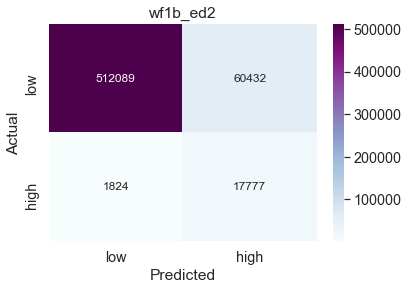

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score, confusion_matrix, classification_report, zero_one_loss, f1_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from datetime import date

#####--------------- ! ! ! ------------------------------######
dataset = wf1b_ed2           # dataset to test 
dataset.name = 'wf1b_ed2'      # name of dataset - is added as confusion matrix header

plot_name = 'RF_model_test_'           # whatever you'd like the plot export name prefix to be e.g. 'RF_model_test'
today = date.today().strftime('%Y-%m-%d')  # for plot save name

print(dataset.columns)

#####--------------- ! ! ! ------------------------------######

#------------------------------------------------------------------------------------------------------------------#
train_wfV, test_wfV = train_test_split(dataset, test_size=0.3, random_state=42)

y_train = train_wfV.cat.values
x_train = train_wfV.drop(['cat'],axis=1).values

y_test = test_wfV.cat.values
x_test = test_wfV.drop(['cat'],axis=1).values

#------------------------------------------------------------------------------------------------------------------#
# import imblearn
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

undersample = RandomUnderSampler(sampling_strategy='majority', random_state=24)
x_under, y_under = undersample.fit_resample(x_train, y_train)
print('')
print(Counter(y_train))
print(Counter(y_under))
#------------------------------------------------------------------------------------------------------------------#

modelRF = RandomForestClassifier(n_estimators=100, min_samples_split=3, min_samples_leaf = 1, max_features='sqrt',
                                   max_depth=None, bootstrap=True, random_state = 42,)

modelRF.fit(x_under, y_under)
pred_y = modelRF.predict(x_test)

# MEASURES
cm = confusion_matrix(y_test, pred_y)
cr = classification_report(y_test, pred_y)
acs = accuracy_score(y_test, pred_y)
error = zero_one_loss(y_test, pred_y)
f1 = f1_score(y_test, pred_y, average='weighted')
recall = recall_score(y_test, pred_y, average='weighted')
# f1 = f1_score(y_test, pred_y, average='macro')
# recall = recall_score(y_test, pred_y, average='macro')

# CONFUSION MATRIX PLOT
df_cm = pd.DataFrame(cm, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
# df_cm = df_cm[['low','med','high']]
# df_cm = df_cm.reindex(['low','med','high'])
df_cm = df_cm[['low','high']]
df_cm = df_cm.reindex(['low','high'])
plt.figure(figsize = (6,4))
ax = plt.axes()
sns.set(font_scale=1.3)#for label size
sns.heatmap(df_cm, cmap="BuPu", annot=True, annot_kws={"size": 12},fmt='g')
ax.set_title(dataset.name)
plt.savefig(os.path.join(plots_path, plot_name + dataset.name + '_' + today +'.png'), dpi = 300)

print(cr)
print('Accuracy = ','{:0.5f}'.format(acs))
print('Recall   = ','{:0.5f}'.format(recall))
print('F1 Score = ','{:0.5f}'.format(f1),'\n')

df_cm